# Simulation of the Bank Run

In this part, we run a simple simulation of the bank run in order to show several implications of the Diamond & Dybvig model. 
For this purpose, we used simulations created by [Christian Yenko](https://github.com/cyenko/dd_sim) which we simplified and adjusted.

In [88]:
import random
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import math
import sys

Firstly, we set some initial values of key variables. We used the same values as C. Yenko; any change is possible, though.

In [89]:
interestRate = 0.2
# Some initial interest rate must be set, otherwise the trial would not work. 
# This particular value is determining for the second simulation only.
maxWithdrawals = 70
# The maximum number of people (out of 100) who may withdraw their money without the bank has to close.
# This particular value is determining for the first simulation only.
numTrials = 100
# The total number of simulations made; during each of them the bank either close or not.

Then we write the general simulation code. The following input contains one trial which is then employed by the final two simulations. Also note that accurate indentation is essential here in order to run the simulation with all the persons involved in each round.

In [90]:
def runTrial(interestRate,maxWithdrawals,initialInvestment):
        numWithdrawals = 0
        # The initial number of withdrawals is 0. 
        # It increases by 1 with each person who decides during any round to withdraw.
        withdrawParameter = 0
        # This parameter increases with every withdrawal. 
        # Higher the parameter is, higher is the current risk aversion of every person.
        peopleList = []
        for i in range(0,100):
            peopleList.append([random.normalvariate(.5,.5/3),0,i])
        # The People List contains personal data of every person out of 100.
        # [0] The first number is a random risk parameter with mean=0.5 and SD=(0.5/3).
        # [1] The second one determines whether the person has already decided to withdraw (1) or not (0).
        # [2] At the third position is "i" - a number in range 0-99 which serves as a personal ID.
        for roundNum in range (0,3):
        # There are 3 rounds of each simulation, in the Diamond&Dybvig paper described as periods T=0,1,2.
            if numWithdrawals < maxWithdrawals:
            # A condition necessary for each round; if not satisfied the bank has already closed.
                for person in peopleList:
                    if numWithdrawals < maxWithdrawals:
                        if not person[1] == 1:
                        # Check if this person has still her investment in bank.
                        # I.e. this person has not withdrawn in previous rounds.
                            num = random.random()
                            # Return a random number in range [0.0, 1.0).
                            currentRiskAversionParam = person[0]+withdrawParameter-interestRate
                            # It is different for each person because of the random risk parameter.
                            # It also varies between rounds as the withdraw parameter may change.
                            if num < currentRiskAversionParam:
                            # Then this person withdraws.
                                numWithdrawals = numWithdrawals + 1
                                person[1]=1
                                # Ensure this person may not participate in following rounds.
                                withdrawParameter = numWithdrawals/100
                                # So that the parameter is higher for every following person and round.
        if numWithdrawals < maxWithdrawals:
            return 0
        else:
            return 1
        # This loop runs after the whole trial (3 rounds with 100 persons).
        # The trial counts for 1 in case that the bank had to close during it.

In the first simulation, we run the trials with gradually increasing interest rate in order to find the relationship between the interest rate and the probability of bank closure.

In [82]:
x = []
y = []
for inc in range(0,100,1):
        interestRate = float(inc)/100
        # The interest rate gradually increases from 0.00 to 0.99.
        closeSum = 0
        for i in range(0,numTrials):
            closeSum = closeSum + runTrial(interestRate,maxWithdrawals,initialInvestment)
            # This variable sums the total number of trials when the bank had to close.
        fractionClose = float(closeSum)/numTrials
        x.append(interestRate)
        y.append(fractionClose)
        # Both the interest rate and the fraction of closed banks are added to lists representing x and y axis.

Finally, we plot the results. The relationship is rather clear - higher the interest rate is, lower is the probability of the bank closure as the Current Risk Aversion Parameter is lower, hence less people prefer withdrawing their money. The shape of the curve is rather steep, indicating that interest rate above 20% guarantees almost zero risk of bank closure.

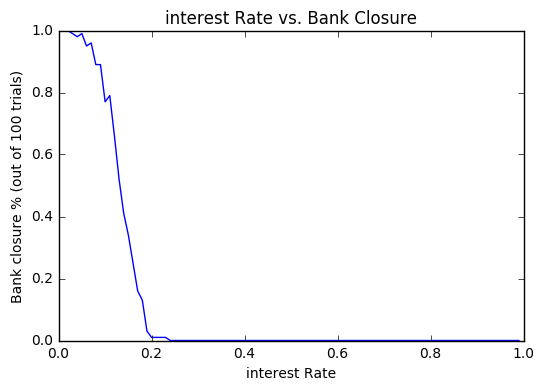

In [83]:
plt.plot(x,y)
plt.xlabel("interest Rate")
plt.ylabel("Bank closure % (out of 100 trials)")
plt.title("interest Rate vs. Bank Closure")
plt.show()

The second simulation shows the effect of increasing maximum number of withdrawals (i.e. how many people may withdraw their initial investment unless the bank closes) on the probability of the bank closure.

In [100]:
x = []
y = []
for inc in range(0,100,1):
        interestRate = 0.2
        # The interest rate is now fixed again.
        maxWithdrawals = inc
        # The maximum number of withdrawals gradually icreases from 0 to 99.
        closeSum = 0
        for i in range(0,numTrials):
            closeSum = closeSum + runTrial(interestRate,maxWithdrawals,initialInvestment)
        fractionClose = float(closeSum)/numTrials
        x.append(maxWithdrawals)
        y.append(fractionClose)

Also here the line is rather steep: given the 20% interest rate, up to maxWithdrawals around 50 the bank had to close in almost every trial. Then the probability is sharply decreasing and it is almost zero above 70 withdrawals.

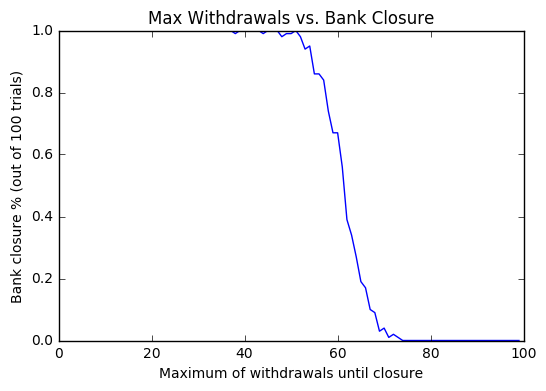

In [101]:
plt.plot(x,y)
plt.xlabel("Maximum of withdrawals until closure")
plt.ylabel("Bank closure % (out of 100 trials)")
plt.title("Max Withdrawals vs. Bank Closure")
plt.show()

The simulation shows that both higher interest rate and higher maximum number of withdrawals (determined mostly by bank reserves) lower the risk of bank closure (i.e. "successful" bank run). The implication for the banking policy is a rather straightforward trade-off between low deposites (or illiquid investments) and providing high interest rate and vice versa.